In [ ]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import math
from sklearn.impute import SimpleImputer

In [ ]:
file_path = "/Users/zhangtianlu/Desktop/dep sym/mldata.csv"
df = pd.read_csv(file_path)
#print(data.head())
df.head()

,family_id,w1profile,w2profile,w3profile,t1mpla,t1smitm,t1smits,t1snmemo,t1spmemo,t1mlb,...,m1trcs,m1tprs,m1rrvs,m1tsoc,m1mexid,t1age_cr,t2age_cr,t3age_cr,t1born,m1educ
0,75,0.0,0.0,0.0,2.000000,2.272727,2.000000,2.25,2.666667,3.000000,...,5.0,3.666667,2.000000,2.666667,3.875000,12.019178,12.986301,17.830137,1,8.0
1,101,2.0,0.0,0.0,2.000000,3.090909,1.555556,3.25,2.000000,3.000000,...,4.0,2.333333,1.000000,3.666667,3.666667,12.745205,13.435616,17.213699,1,5.0
2,116,0.0,0.0,0.0,1.400000,3.818182,1.800000,1.00,3.000000,4.333333,...,2.0,3.666667,2.666667,3.333333,4.000000,13.115068,13.824658,18.523288,1,2.0
3,129,0.0,0.0,NaN,1.400000,2.545455,1.166667,1.75,2.666667,3.333333,...,4.0,4.333333,2.000000,2.666667,3.333333,11.780822,12.772603,NaN,1,4.0
4,148,0.0,0.0,NaN,1.857143,5.090909,1.545455,2.75,3.000000,4.000000,...,2.5,2.666667,1.333333,2.666667,3.777778,13.260274,14.161644,NaN,1,6.0


In [ ]:
#select samples with wave1 profile data
df1 = df.dropna(subset=['w1profile'])

#make sure the sample size is correct
num_samples = df1.shape[0]
print("Number of samples:", num_samples)

df1.head()

Number of samples: 595


,family_id,w1profile,w2profile,w3profile,t1mpla,t1smitm,t1smits,t1snmemo,t1spmemo,t1mlb,...,m1trcs,m1tprs,m1rrvs,m1tsoc,m1mexid,t1age_cr,t2age_cr,t3age_cr,t1born,m1educ
0,75,0.0,0.0,0.0,2.000000,2.272727,2.000000,2.25,2.666667,3.000000,...,5.0,3.666667,2.000000,2.666667,3.875000,12.019178,12.986301,17.830137,1,8.0
1,101,2.0,0.0,0.0,2.000000,3.090909,1.555556,3.25,2.000000,3.000000,...,4.0,2.333333,1.000000,3.666667,3.666667,12.745205,13.435616,17.213699,1,5.0
2,116,0.0,0.0,0.0,1.400000,3.818182,1.800000,1.00,3.000000,4.333333,...,2.0,3.666667,2.666667,3.333333,4.000000,13.115068,13.824658,18.523288,1,2.0
3,129,0.0,0.0,NaN,1.400000,2.545455,1.166667,1.75,2.666667,3.333333,...,4.0,4.333333,2.000000,2.666667,3.333333,11.780822,12.772603,NaN,1,4.0
4,148,0.0,0.0,NaN,1.857143,5.090909,1.545455,2.75,3.000000,4.000000,...,2.5,2.666667,1.333333,2.666667,3.777778,13.260274,14.161644,NaN,1,6.0


In [ ]:
x1 = df1.iloc[:, 4:65]  # Selecting columns 4 to 35
y1 = df1.iloc[:, 1]  # Extracting the last column

#Impute missing values using the mean of each feature
imputer = SimpleImputer(strategy='mean')
x1 = imputer.fit_transform(x1)

# Display the extracted features and dependent variable
#print("\nFeatures:")
#print(x1.head())
#print("\nDependent Variable:")
#print(y1.head())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from xgboost import plot_importance

import xgboost as xgb

In [ ]:
max_depth_array = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Decision tree

In [ ]:
pre_dt = [] # use "precision" as the performance score

for i in range(len(max_depth_array)):
  depth = max_depth_array[i]
  pre_ = []
  print('.', end='')
  for i in range(100):
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.33)
    dt_classifier = DecisionTreeClassifier(max_depth = depth, random_state=42)
    dt_classifier.fit(x1_train, y1_train)
    y1_pred = dt_classifier.predict(x1_test)
    #precision = precision_score(y1_test, y1_pred, average = 'macro') # Use weighted (or macro)
    accuracy = accuracy_score(y1_test, y1_pred)
    pre_.append(accuracy)

  pre_dt.append(np.mean(pre_))

...........

In [ ]:
pre_dt

[0.8145685279187819,
 0.8002030456852792,
 0.7948223350253807,
 0.7825380710659898,
 0.7735532994923857,
 0.7594416243654822,
 0.7526903553299494,
 0.7426903553299492,
 0.7455329949238579,
 0.7363451776649745,
 0.734720812182741]

# XGBoost

In [ ]:
pre_XGB = [] # use "precision" as the performance score

for i in range(len(max_depth_array)):
  depth = max_depth_array[i]
  XGB_ = []
  print('.', end='')
  for i in range(100):
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.33)
    num_classes = len(np.unique(y1_train))  # Calculate the number of classes
    XGB_classifier = xgb.XGBClassifier(random_state=0, max_depth=depth, objective='multi:softmax', num_class=num_classes)
    XGB_classifier.fit(x1_train, y1_train)
    y1_pred = XGB_classifier.predict(x1_test)
    #precision = precision_score(y1_test, y1_pred, average= 'macro') # Use weighted (or macro)
    accuracy = accuracy_score(y1_test, y1_pred)
    XGB_.append(accuracy)

  pre_XGB.append(np.mean(XGB_))

...........

In [ ]:
pre_XGB

[0.8074111675126905,
 0.8138578680203047,
 0.8106091370558376,
 0.8107106598984771,
 0.812741116751269,
 0.8120304568527917,
 0.8139086294416243,
 0.8168020304568528,
 0.8114213197969543,
 0.8143147208121827,
 0.8098477157360408]

In [ ]:
pre_RF = [] # use "precision" as the performance score

for i in range(len(max_depth_array)):
  depth = max_depth_array[i]
  RF_ = []
  print('.', end='')
  for i in range(100):
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.33)
    RF_classifier = RandomForestClassifier(max_depth = depth, bootstrap=False, random_state=42)
    RF_classifier.fit(x1_train, y1_train)
    y1_pred = RF_classifier.predict(x1_test)
    #precision = precision_score(y1_test, y1_pred, average= 'weighted') # Use weighted (or macro)
    accuracy = accuracy_score(y1_test, y1_pred)
    RF_.append(accuracy)

  pre_RF.append(np.mean(RF_))

...........

In [ ]:
pre_RF

[0.8285279187817258,
 0.8267512690355329,
 0.8275634517766497,
 0.8302538071065991,
 0.8242131979695432,
 0.821015228426396,
 0.8234517766497464,
 0.8211675126903554,
 0.8212182741116751,
 0.8218274111675128,
 0.8214213197969543]

# Comparison and model selection
## We will choose the model with the highest precision

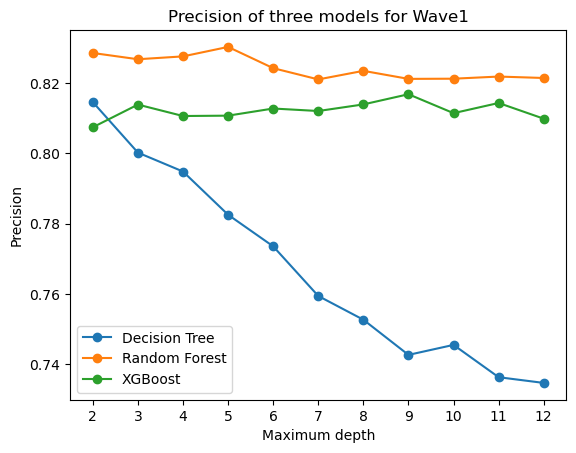

In [ ]:
plt.plot(max_depth_array, pre_dt, label='Decision Tree', marker='o')
plt.plot(max_depth_array, pre_RF, label='Random Forest', marker='o')
plt.plot(max_depth_array, pre_XGB, label='XGBoost', marker='o')

plt.title('Precision of three models for Wave1')

# Adding x and y labels
plt.xlabel('Maximum depth')
plt.ylabel('Precision')

plt.xticks(max_depth_array)
# Showing the legend
plt.legend()

# Save the plot as a JPG file
plt.savefig('w1tow1_multisoftmax100_add.jpg', format='jpg')  # Save as JPG

# Display the plot
plt.show()

# Feature Importance analysis

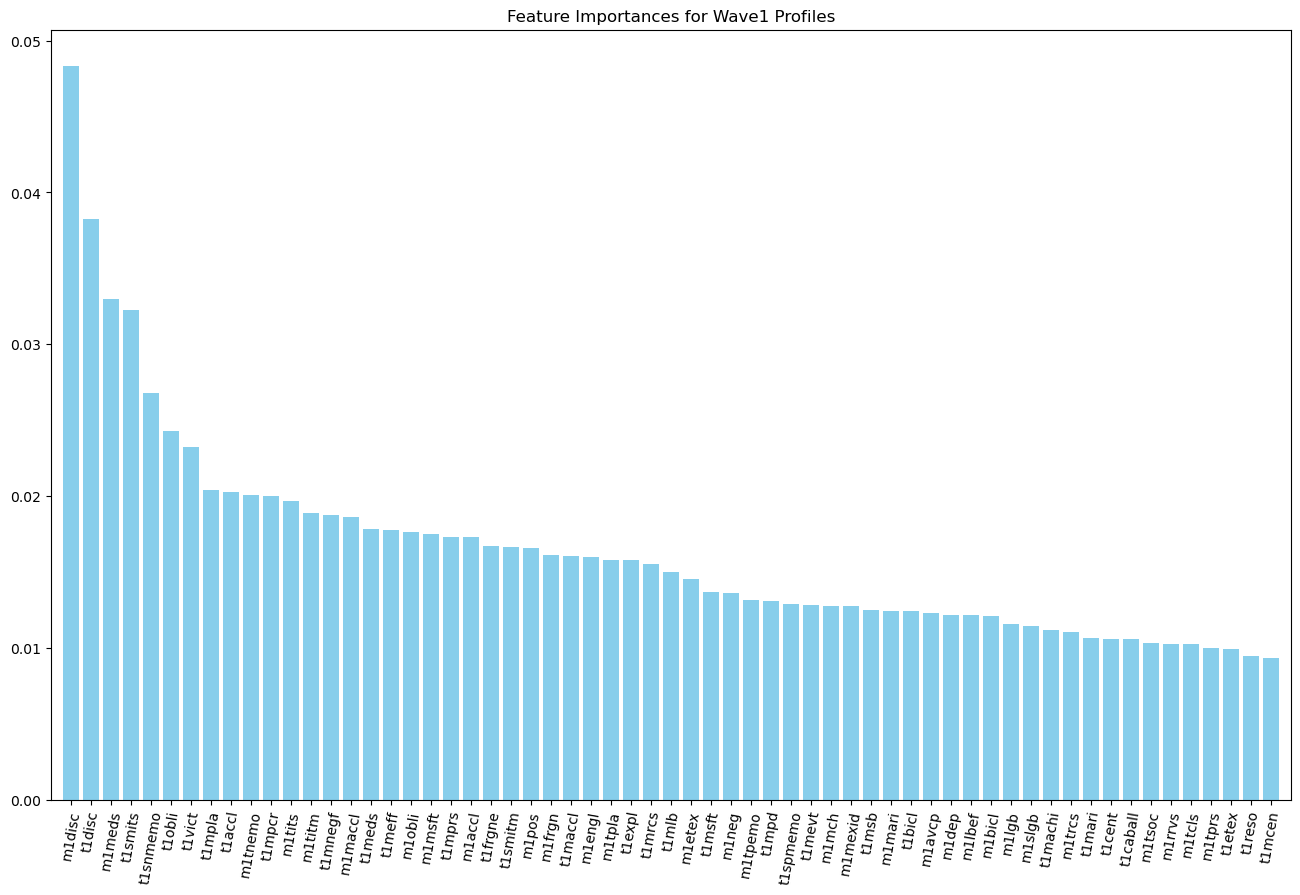

In [ ]:
x1 = df1.iloc[:, 4:65]  # Selecting columns 4 to 35
y1 = df1.iloc[:, 1]  # Extracting the last column

# Impute missing values using the mean of each feature
imputer = SimpleImputer(strategy='mean')
x1 = imputer.fit_transform(x1)

Feature_Im = []
for i in range(10):
  x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.33)
  #XGB_classifier = xgb.XGBClassifier(random_state=0, max_depth=5, objective='reg:squarederror')
  RF_classifier = RandomForestClassifier(max_depth = depth, bootstrap=False, random_state=42)
  RF_classifier.fit(x1_train, y1_train)
  # Get feature importances
  importances =  RF_classifier.feature_importances_
  Feature_Im.append(importances)

importances = np.array(Feature_Im).mean(axis=0)

# Retrieve feature names
x1 = df1.iloc[:, 4:65]  # Selecting columns 4 to 35
feature_names = list(x1.columns)

# Assign colors based on the starting letters of feature names
colors = ['red' if name.startswith('t') else 'blue' for name in feature_names]

# Plot feature importances
plt.figure(figsize=(16, 10))
indices = np.argsort(importances)[::-1]
plt.title('Feature Importances for Wave1 Profiles')
plt.bar(range(x1_train.shape[1]), importances[indices], color="skyblue",align="center")
plt.xticks(range(x1_train.shape[1]), [feature_names[i] for i in indices], rotation=80)  # Rotate labels for better readability
#plt.xticks(range(x1_train.shape[1]), indices)
plt.xlim([-1, x1_train.shape[1]])

# Save the plot as a JPG file
#plt.savefig('w1tow1_feature_impor100_addfeatures.jpg', format='jpg')  # Save as JPG

plt.show()

#Make a prediction for a new data point

In [ ]:
class_new_data = XGB_classifier.predict(new_data)
# new_data should be a 2D array with the shape (1, number of features)

## wave 1 predictors to wave 3 outcomes

In [ ]:
#select samples with wave1 profile data
df3 = df.dropna(subset=['w3profile'])

#make sure the sample size is correct
num_samples = df3.shape[0]
print("Number of samples:", num_samples)

df3.head()

Number of samples: 328


,family_id,w1profile,w2profile,w3profile,t1mpla,t1smitm,t1smits,t1snmemo,t1spmemo,t1mlb,...,m1trcs,m1tprs,m1rrvs,m1tsoc,m1mexid,t1age_cr,t2age_cr,t3age_cr,t1born,m1educ
0,75,0.0,0.0,0.0,2.0,2.272727,2.000000,2.25,2.666667,3.000000,...,5.0,3.666667,2.000000,2.666667,3.875000,12.019178,12.986301,17.830137,1,8.0
1,101,2.0,0.0,0.0,2.0,3.090909,1.555556,3.25,2.000000,3.000000,...,4.0,2.333333,1.000000,3.666667,3.666667,12.745205,13.435616,17.213699,1,5.0
2,116,0.0,0.0,0.0,1.4,3.818182,1.800000,1.00,3.000000,4.333333,...,2.0,3.666667,2.666667,3.333333,4.000000,13.115068,13.824658,18.523288,1,2.0
6,151,0.0,0.0,0.0,1.0,5.545455,1.000000,1.00,6.333333,5.000000,...,5.0,5.000000,1.666667,3.666667,4.444444,11.495890,12.493151,17.210959,2,8.0
8,158,0.0,0.0,0.0,1.0,3.363636,1.142857,1.75,5.000000,3.333333,...,4.5,3.666667,2.333333,4.666667,4.000000,11.315068,14.169863,18.260274,1,8.0


In [ ]:
x3 = df3.iloc[:, 4:65]  # Extracting all columns except the last one
y3 = df3.iloc[:, 3]  # Extracting the last column

# Impute missing values using the mean of each feature
imputer = SimpleImputer(strategy='mean')
x3 = imputer.fit_transform(x3)

# Display the extracted features and dependent variable
#print("\nFeatures:")
#print(x3.head())
#print("\nDependent Variable:")
#print(y3.head())

## Decision tree_wave 1 feathres to wave 3 outcomes

In [ ]:
pre_dt = [] # use "precision" as the performance score

max_depth_array = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


for i in range(len(max_depth_array)):
  depth = max_depth_array[i]
  pre_ = []
  print('.', end='')
  for i in range(100):
    x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.33)
    dt_classifier = DecisionTreeClassifier(max_depth = depth, random_state=42)
    dt_classifier.fit(x3_train, y3_train)
    y3_pred = dt_classifier.predict(x3_test)
    #precision = precision_score(y3_test, y3_pred, average = 'weighted') # Use weighted (or macro)
    accuracy = accuracy_score(y3_test, y3_pred)
    pre_.append(accuracy)

  pre_dt.append(np.mean(pre_))

...........

In [ ]:
pre_dt

[0.8627522935779816,
 0.8549541284403669,
 0.8427522935779815,
 0.828532110091743,
 0.819633027522936,
 0.8150458715596329,
 0.7993577981651377,
 0.7985321100917433,
 0.7960550458715595,
 0.7938532110091744,
 0.7897247706422017]

## XGBoost

In [ ]:
pre_XGB = [] # use "precision" as the performance score

for i in range(len(max_depth_array)):
  depth = max_depth_array[i]
  XGB_ = []
  print('.', end='')
  for i in range(100):
    x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.33)
    num_classes = len(np.unique(y3_train))  # Calculate the number of classes
    XGB_classifier = xgb.XGBClassifier(random_state=0, max_depth=depth, objective='multi:softmax', num_class=num_classes)
    XGB_classifier.fit(x3_train, y3_train)
    y3_pred = XGB_classifier.predict(x3_test)
    #precision = precision_score(y3_test, y3_pred, average= 'weighted') # Use weighted (or macro)
    accuracy = accuracy_score(y3_test, y3_pred)
    XGB_.append(accuracy)

  pre_XGB.append(np.mean(XGB_))

...........

In [ ]:
pre_XGB

[0.8812844036697247,
 0.885504587155963,
 0.8887155963302752,
 0.88651376146789,
 0.891467889908257,
 0.8843119266055046,
 0.8858715596330274,
 0.886880733944954,
 0.8911009174311928,
 0.8828440366972479,
 0.8893577981651376]

## Random forest

In [ ]:
pre_RF = [] # use "precision" as the performance score

for i in range(len(max_depth_array)):
  depth = max_depth_array[i]
  RF_ = []
  print('.', end='')
  for i in range(100):
    x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.33)
    RF_classifier = RandomForestClassifier(max_depth = depth, bootstrap=False, random_state=42)
    RF_classifier.fit(x3_train, y3_train)
    y1_pred = RF_classifier.predict(x3_test)
    #precision = precision_score(y1_test, y1_pred, average= 'weighted') # Use weighted (or macro)
    accuracy = accuracy_score(y3_test, y3_pred)
    RF_.append(accuracy)

  pre_RF.append(np.mean(RF_))

...........

In [ ]:
pre_RF

[0.8824770642201832,
 0.888440366972477,
 0.8833027522935781,
 0.8867889908256881,
 0.8809174311926607,
 0.8866055045871558,
 0.8877981651376146,
 0.8835779816513761,
 0.8833027522935779,
 0.8846788990825689,
 0.8819266055045871]

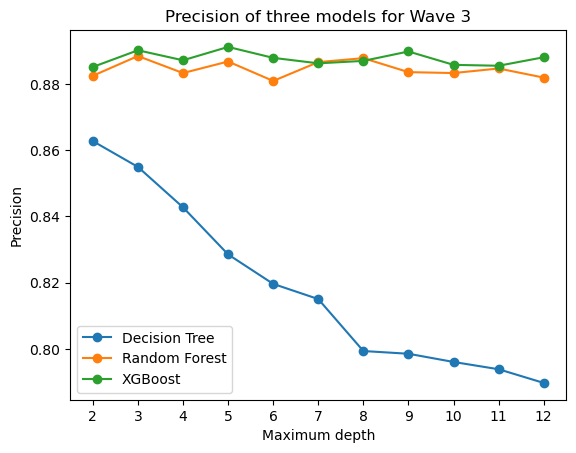

In [ ]:
plt.plot(max_depth_array, pre_dt, label='Decision Tree', marker='o')
plt.plot(max_depth_array, pre_RF, label='Random Forest', marker='o')
plt.plot(max_depth_array, pre_XGB, label='XGBoost', marker='o')

plt.title('Precision of three models for Wave 3')

# Adding x and y labels
plt.xlabel('Maximum depth')
plt.ylabel('Precision')

plt.xticks(max_depth_array)
# Showing the legend
plt.legend()

plt.savefig('w3w3_multisoftmax100_addfeatures.jpg', format='jpg')  # Save as JPG

# Display the plot
plt.show()

###cannot see if decision tree fits the data better or xgboost

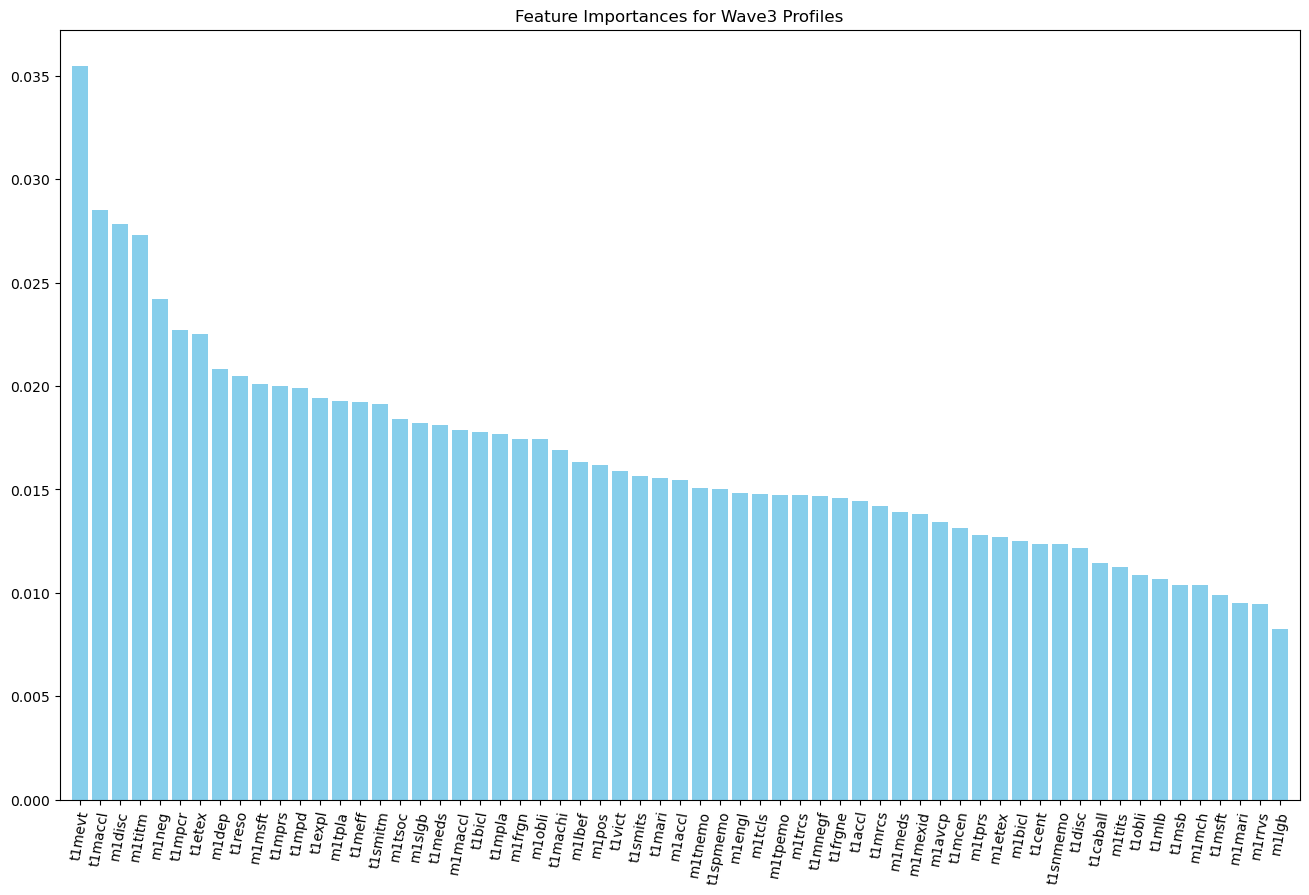

In [ ]:
x3 = df3.iloc[:, 4:65]  # Extracting all columns except the last one
y3 = df3.iloc[:, 3]  # Extracting the last column

# Impute missing values using the mean of each feature
imputer = SimpleImputer(strategy='mean')
x3 = imputer.fit_transform(x3)


Feature_Im = []
for i in range(10):
  x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.33)
  XGB_classifier = xgb.XGBClassifier(random_state=0, max_depth=5, objective='multi:softmax')
  XGB_classifier.fit(x3_train, y3_train)

  # Get feature importances
  importances =  XGB_classifier.feature_importances_
  Feature_Im.append(importances)

importances = np.array(Feature_Im).mean(axis=0)

# Retrieve feature names
x3 = df3.iloc[:, 4:65]  # Selecting columns 4 to 35
feature_names = list(x3.columns)

# Plot feature importances
plt.figure(figsize=(16, 10))
indices = np.argsort(importances)[::-1]
plt.title('Feature Importances for Wave3 Profiles')
plt.bar(range(x3_train.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(x3_train.shape[1]), [feature_names[i] for i in indices], rotation=80)  # Rotate labels for better readability
#plt.xticks(range(x1_train.shape[1]), indices)
plt.xlim([-1, x3_train.shape[1]])

# Save the plot as a JPG file
plt.savefig('w1tow3_feature_impor100_addfeatures.png', format='jpg')  # Save as JPG

plt.show()

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
# define features and the target variables.
y3_df = y3.to_frame()

model = xgb.XGBClassifier(max_depth=5).fit(x3, y3_df.values.ravel())

In [ ]:
#import shap
# Create a SHAP explainer object
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(x3)

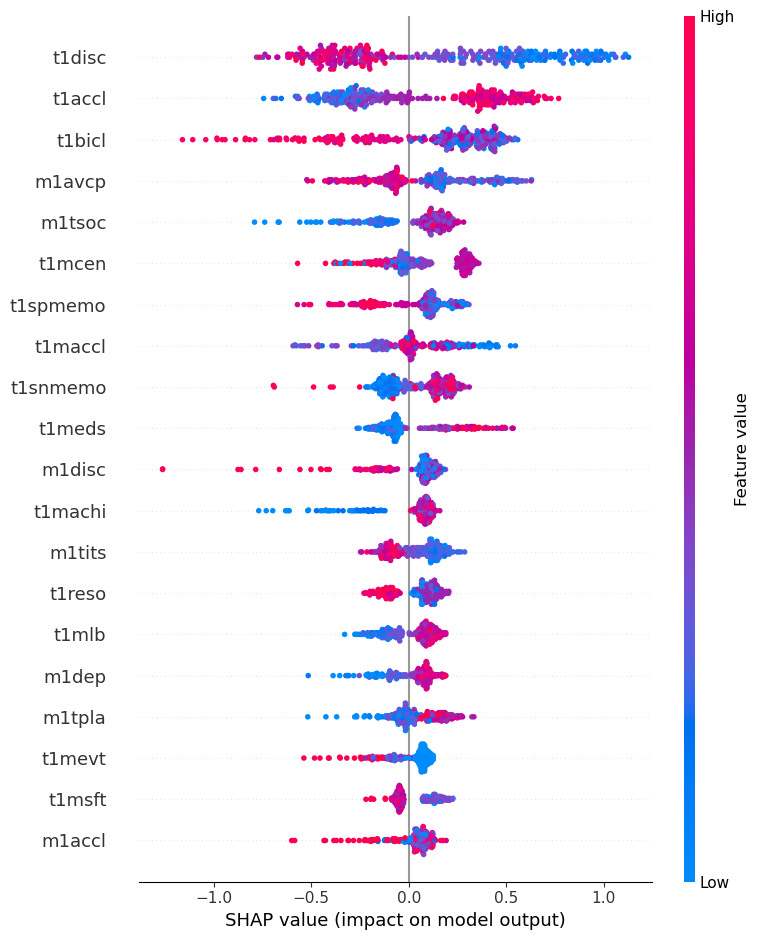

<Figure size 640x480 with 0 Axes>

In [ ]:
feature_names = df3.columns[4:65]  # Assuming features start from index 4 to 64

shap_values_array = shap_values[0]

shap.summary_plot(shap_values_array, x3, feature_names=feature_names)

# Save the plot as a JPG file
plt.savefig('shap_0.jpg', format='jpg')  # Save as JPG

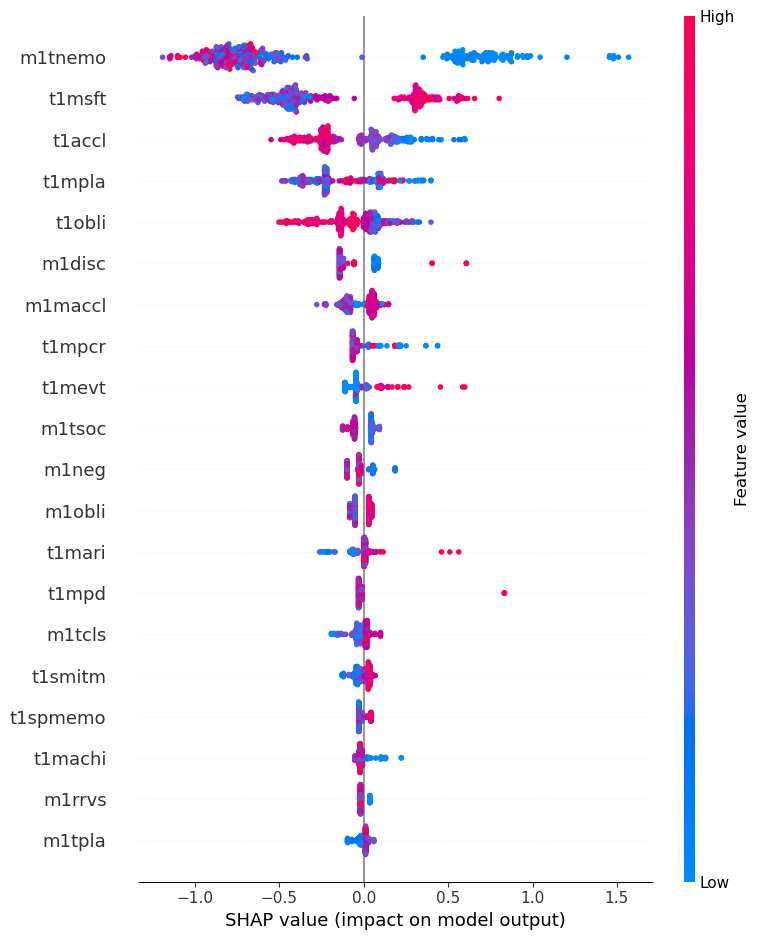

<Figure size 640x480 with 0 Axes>

In [ ]:
feature_names = df3.columns[4:65]  # Assuming features start from index 4 to 64

shap_values_array = shap_values[1]

shap.summary_plot(shap_values_array, x3, feature_names=feature_names)

plt.savefig('shap_01.jpg', format='jpg')  # Save as JPG

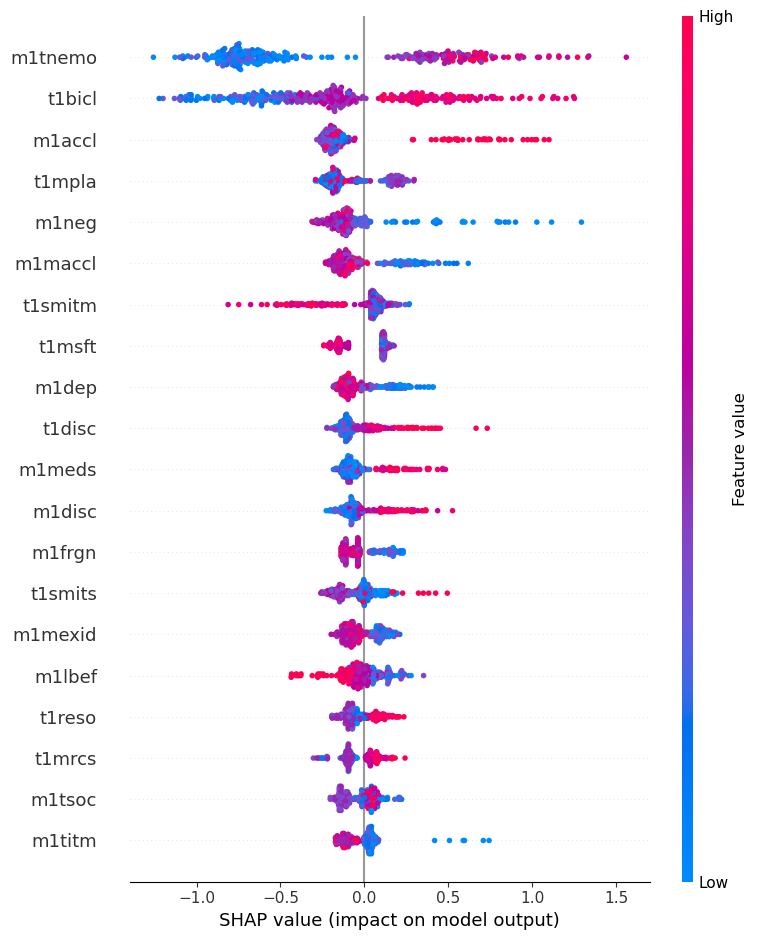

<Figure size 640x480 with 0 Axes>

In [ ]:
feature_names = df3.columns[4:65]  # Assuming features start from index 4 to 64

shap_values_array = shap_values[2]

shap.summary_plot(shap_values_array, x3, feature_names=feature_names)

plt.savefig('shap_02.jpg', format='jpg')  # Save as JPG

In [ ]:
# define features and the target variables.
y1_df = y1.to_frame()

model_w1 = RandomForestClassifier(max_depth=3).fit(x1, y1_df.values.ravel())

In [ ]:
#import shap
# Create a SHAP explainer object
explainer = shap.TreeExplainer(model_w1)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(x1)

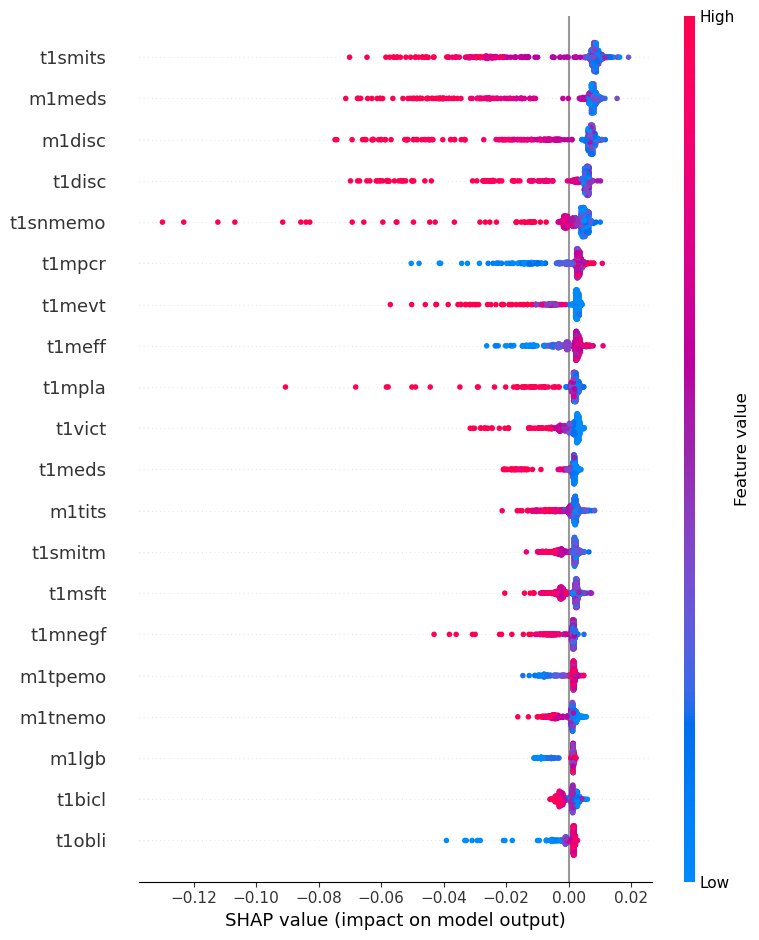

In [ ]:
feature_names = df1.columns[4:65]  # Assuming features start from index 4 to 64

shap_values_array = shap_values[0]

shap.summary_plot(shap_values_array, x1, feature_names=feature_names)

# Save the plot as a JPG file
#plt.savefig('shap_0_w1.jpg', format='jpg')  # Save as JPG

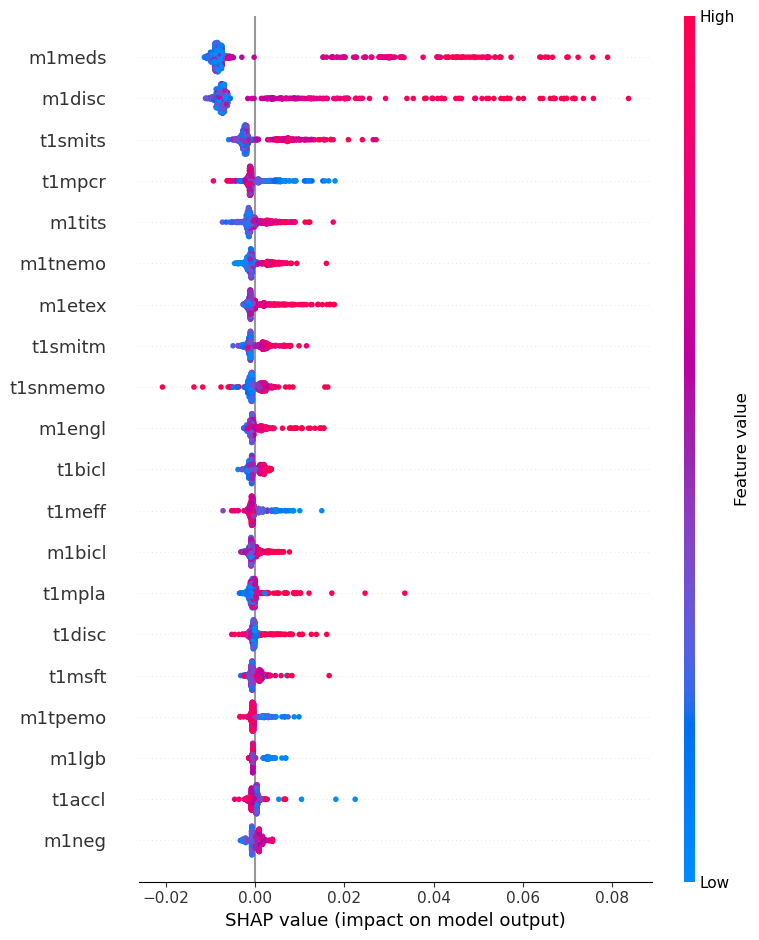

In [ ]:
feature_names = df1.columns[4:65]  # Assuming features start from index 4 to 64

shap_values_array = shap_values[1]

shap.summary_plot(shap_values_array, x1, feature_names=feature_names)

# Save the plot as a JPG file
#plt.savefig('shap_0_w1.jpg', format='jpg')  # Save as JPG

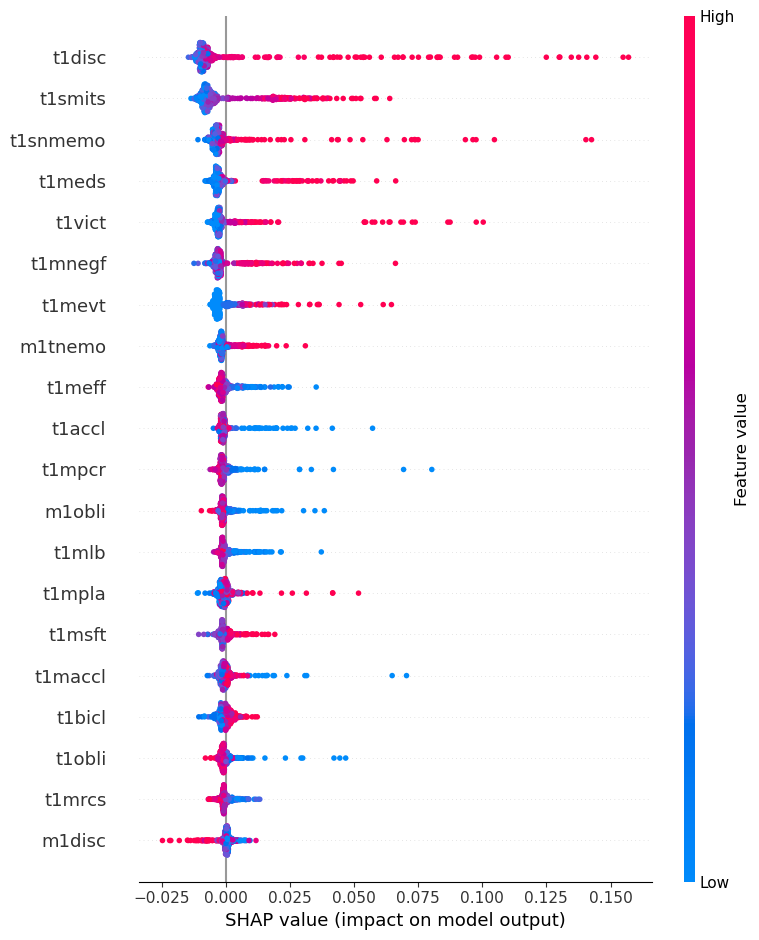

<Figure size 640x480 with 0 Axes>

In [ ]:
feature_names = df1.columns[4:65]  # Assuming features start from index 4 to 64

shap_values_array = shap_values[2]

shap.summary_plot(shap_values_array, x1, feature_names=feature_names)

# Save the plot as a JPG file
plt.savefig('shap_2_w1.jpg', format='jpg')  # Save as JPG